In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("house_pricing.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

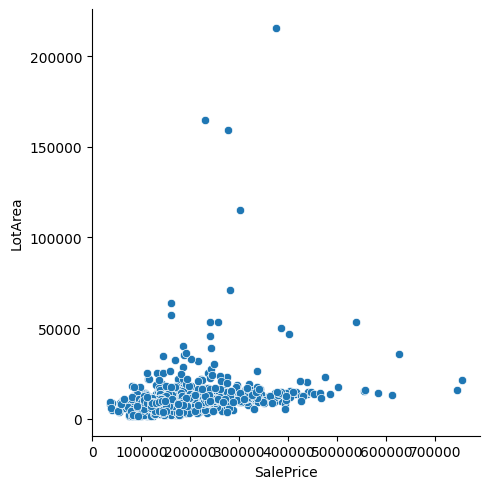

In [ ]:
sns.relplot(x="SalePrice", y="LotArea", data=df)

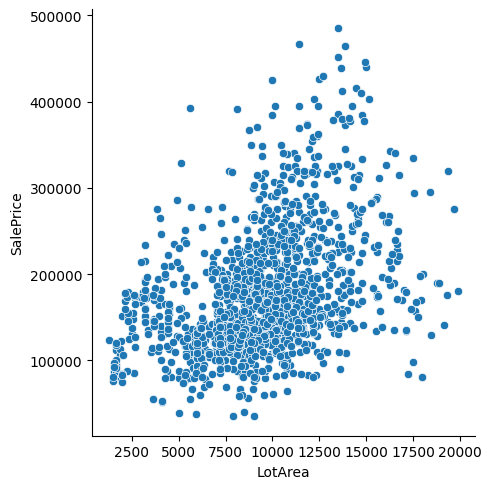

In [ ]:
sns.relplot(x="LotArea", y="SalePrice",
            data=df.loc[(df['LotArea'] < 20000) & (df['SalePrice'] < 500000), :])

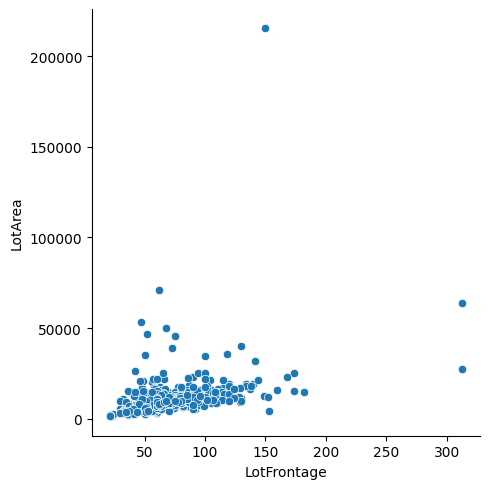

In [ ]:
sns.relplot(x="LotFrontage", y="LotArea", data=df)

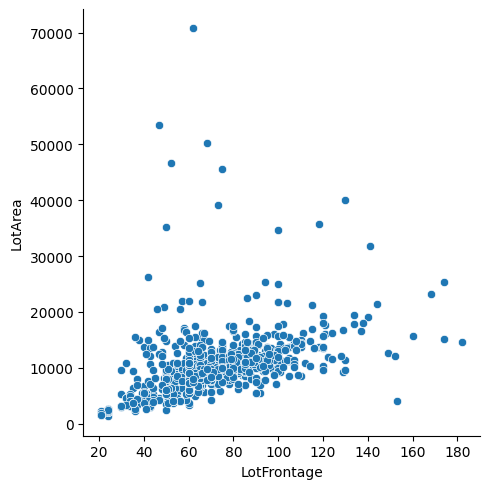

In [ ]:
sns.relplot(x="LotFrontage", y="LotArea", data=df[(df.LotFrontage < 200) &
                                                       (df.LotArea < 100000)])

In [ ]:
df = df.iloc[:,-15:]

In [ ]:
correlation = df.corr()
correlation

<ipython-input-11-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


<Axes: >

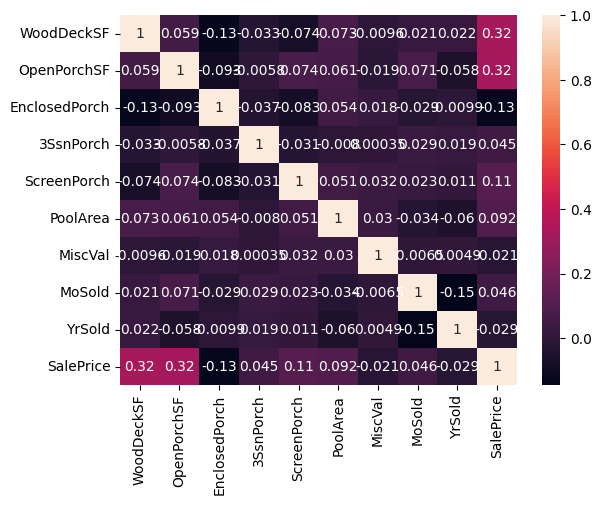

In [ ]:
sns.heatmap(correlation, annot=True)

In [ ]:
abs(correlation['SalePrice']).sort_values(ascending = False)

SalePrice        1.000000
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
MiscVal          0.021190
Name: SalePrice, dtype: float64

In [ ]:
data=pd.read_csv("IBM_HR_ATTRITION.csv")

In [ ]:
data["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x.lower()=="yes" else 0)

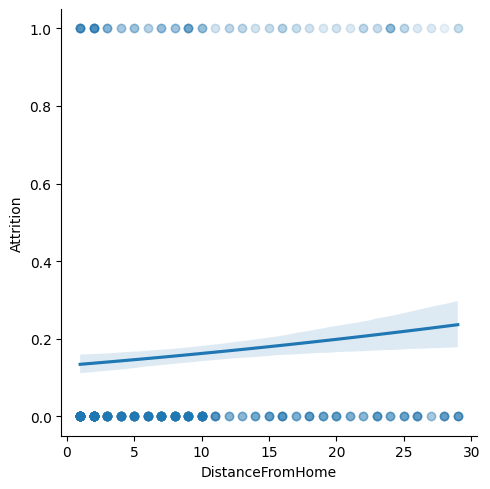

In [ ]:
sns.lmplot(x="DistanceFromHome", y="Attrition", data= data, logistic = True, scatter_kws={"alpha":.05})

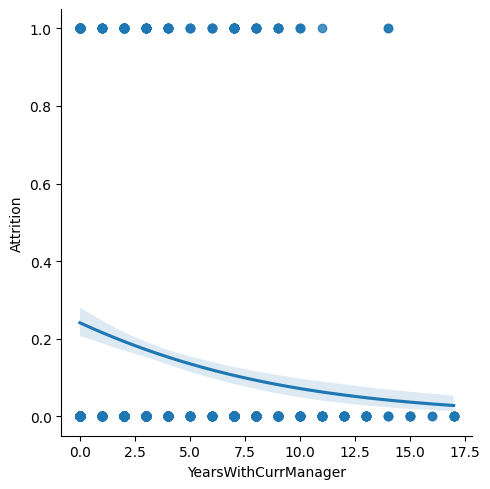

In [ ]:
sns.lmplot(x="YearsWithCurrManager", y="Attrition", data= data, logistic = True)

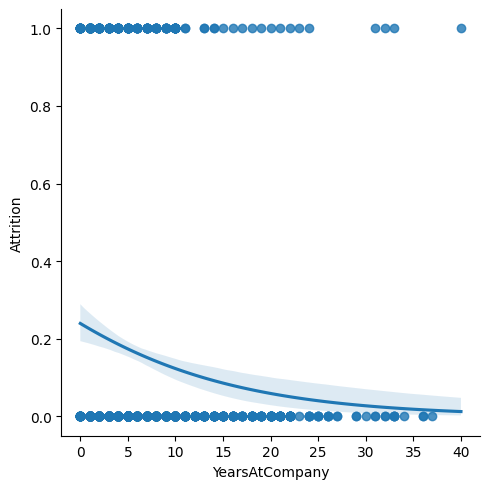

In [ ]:
sns.lmplot(x="YearsAtCompany", y="Attrition", data= data, logistic = True)

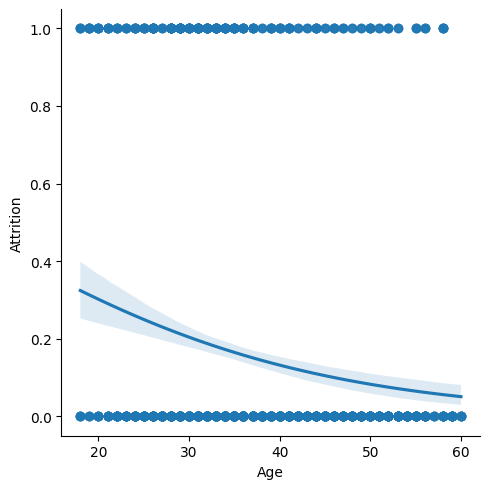

In [ ]:
sns.lmplot(x="Age", y="Attrition", data= data, logistic = True)

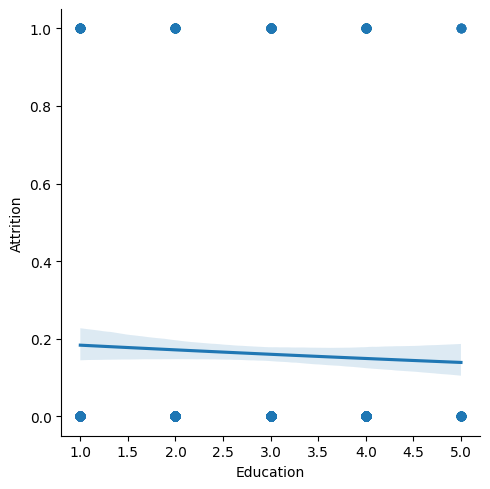

In [ ]:
sns.lmplot(x="Education", y="Attrition", data= data, logistic = True)

<ipython-input-27-932cfc458800>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MonthlyIncome'])


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

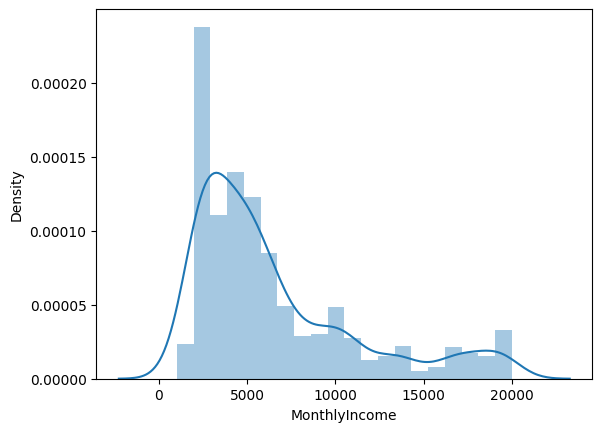

In [ ]:
sns.distplot(data['MonthlyIncome'])

<ipython-input-29-ee03946c14d9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data['MonthlyIncome'] < 8000, 'MonthlyIncome'], bins = 40)


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

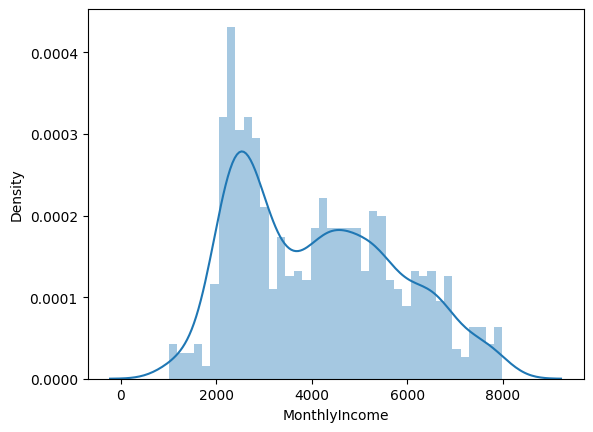

In [ ]:
sns.distplot(data.loc[data['MonthlyIncome'] < 8000, 'MonthlyIncome'], bins = 40)

In [ ]:
dt=pd.read_csv("sales_predictions.csv")

In [ ]:
dataset = dt.sample(25)
dataset.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
37567,28.01.2013,0.0,6.0,6724.0,299.5,1.0
247732,08.03.2013,2.0,35.0,4906.0,1499.0,1.0
62970,17.01.2013,0.0,31.0,6484.0,299.0,1.0
167139,23.02.2013,1.0,3.0,5262.0,599.5,1.0
149511,16.02.2013,1.0,14.0,4092.0,299.0,1.0


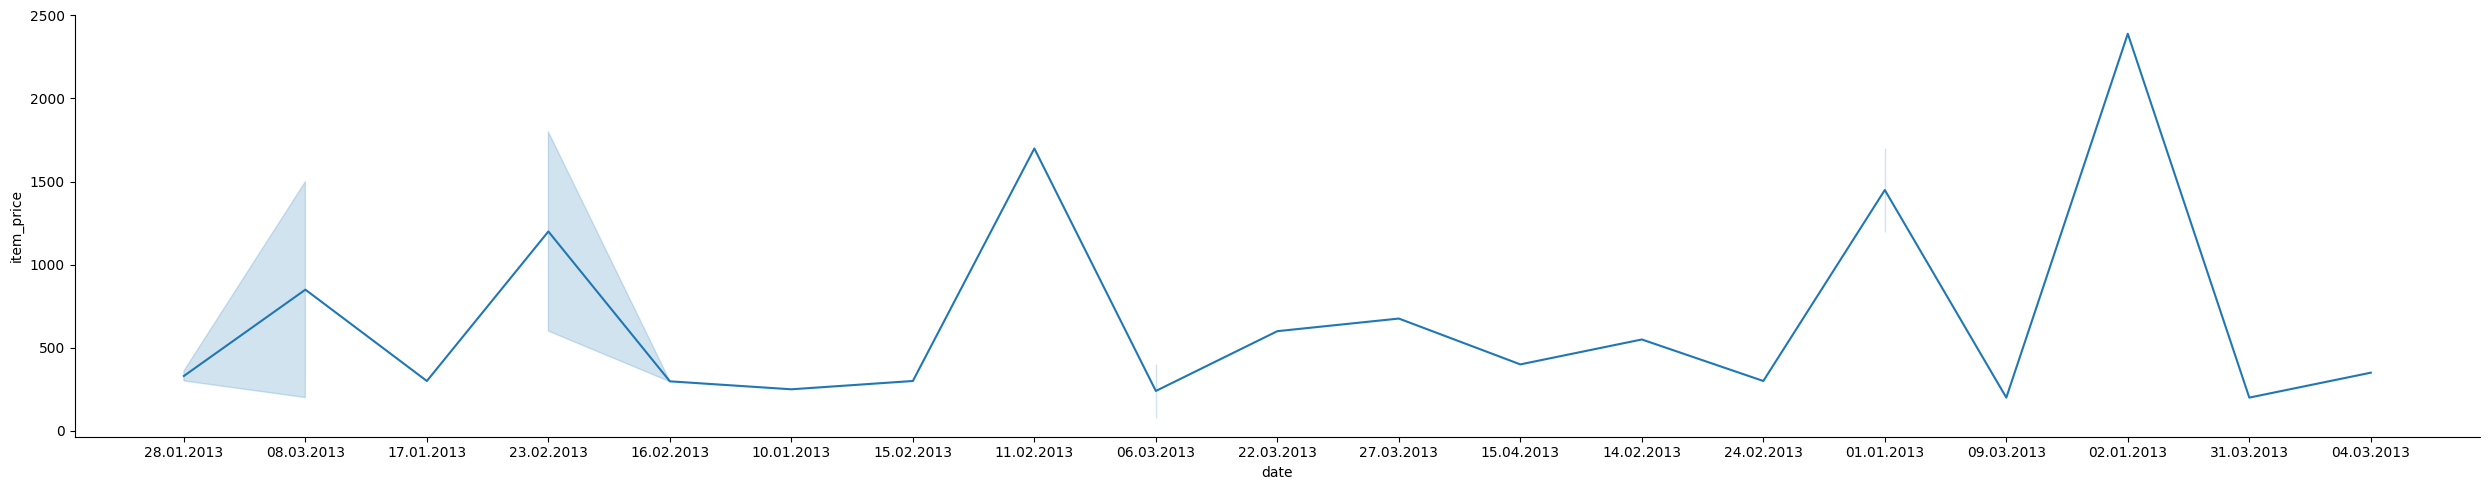

In [ ]:
sns.relplot(x="date", y="item_price", data = dataset, kind="line", height = 5, aspect = 5)

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])

<ipython-input-37-5291e6efdb34>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['date'] = pd.to_datetime(dataset['date'])


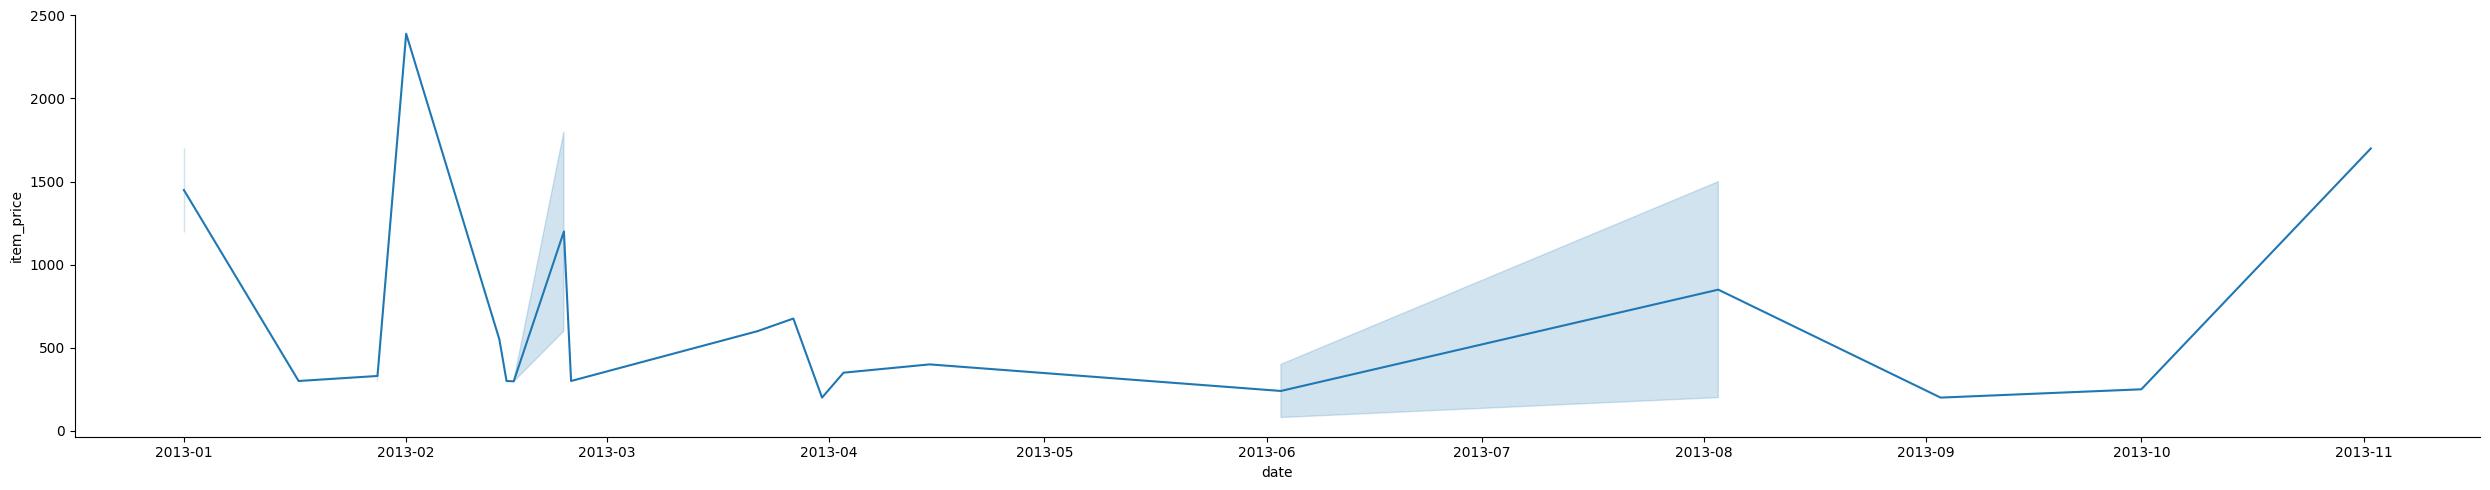

In [ ]:
sns.relplot(x="date", y="item_price", data = dataset, kind="line", height = 5, aspect = 5)